First, go to https://apps.automeris.io/wpd/ and use the Automatic extraction tool to make a scatter plot of 
points that cover the footprint

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
from astropy import units as u
import astropy.coordinates as coord

In [2]:
cmap = colors.LinearSegmentedColormap.from_list('',['w','C0'],256)

Define standardized grid for the footprint

In [3]:
plt.rcParams['font.size'] = 13
dstep = 5
ra_bins = np.arange(-180,181,dstep)
dec_bins = np.arange(-90,91,dstep)

In [4]:
# \\ this is from WebPlotDigitizer
boss = pd.read_csv("./footprint.csv", names=['ra','dec'])

Recast ra into (-180,180)

In [5]:
ra = coord.Angle(boss['ra'].values*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(boss['dec'].values*u.degree)

In [6]:
ra_assns = np.digitize(ra.to(u.deg), ra_bins)
dec_assns = np.digitize(dec.to(u.deg), dec_bins)

In [7]:
# \\ Build reverse engineered footprint
fgrid = np.zeros([ra_bins.size,dec_bins.size])

for ra_id, dec_id in zip(ra_assns,dec_assns):
    fgrid[ra_id-1,dec_id-1] = 1

In [8]:
np.save('./BOSSDR9_footprint.npy', fgrid)

In [9]:
RAg,DECg = np.meshgrid(np.deg2rad(ra_bins),np.deg2rad(dec_bins))

In [10]:
rstep = np.deg2rad(dstep)

# \\ build dA grid 
agrid = np.zeros_like(fgrid)
for i in range(fgrid.shape[0]):
    for j in range(fgrid.shape[1]):
        dA = abs(rstep * (np.sin(DECg[j,i]+rstep) - np.sin(DECg[j,i])))
        agrid[i,j] = dA

## Check area coverage and footprint 

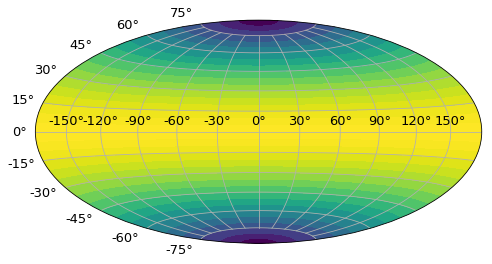

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="hammer")
ax.pcolormesh ( RAg,DECg, agrid.T, cmap='viridis')
ax.grid ()

Text(0,0.5,'Dec (deg)')

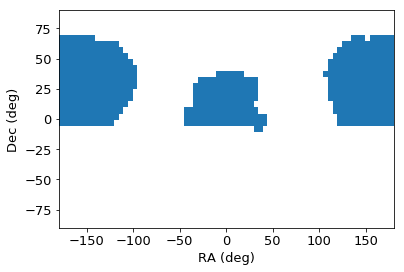

In [12]:
ax = plt.subplot(111)
ax.pcolor(ra_bins,dec_bins,fgrid.T, cmap=cmap)
#plt.scatter(ra, dec, s=1)
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')

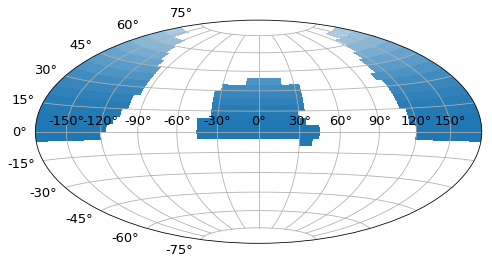

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="hammer")
ax.pcolormesh ( RAg,DECg, fgrid.T * agrid.T, cmap=cmap)
ax.grid ()

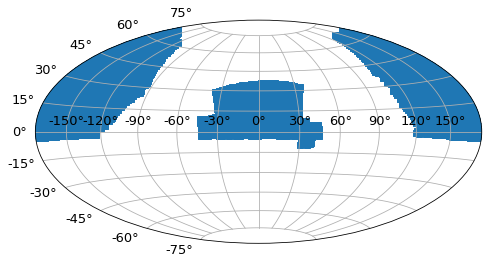

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="hammer")
ax.scatter(ra.radian, dec.radian, marker='s')

ax.grid()